In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

# Files to load
city_data_to_load = "ResourCes/city_data.csv"
ride_data_to_load = "ResourCes/ride_data.csv"



In [2]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
# Ger the columns and the rows that are not null
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the colums and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [10]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Get columns and the rows that not nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [48]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='right', on=["city", "city"])
# pyber_data_df
# city_data_df
# Display the the DataFrame

In [14]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [47]:
# Create the Urban DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# urban_cities_df.head()



In [46]:
# Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# suburban_cities_df.head()
# rural_cities_df.head()

In [44]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# urban_ride_count

In [38]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [43]:
# suburban_ride_count
# rural_ride_count

In [53]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# urban_avg_fare.head()

In [54]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [57]:
# Get the average number of drivers for each urban city

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [92]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# suburban_driver_count
# rural_driver_count

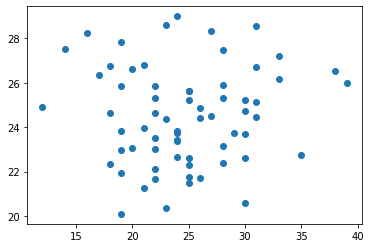

In [69]:
# Build the  scatter plots for urban cities

plt.scatter(urban_ride_count, urban_avg_fare)

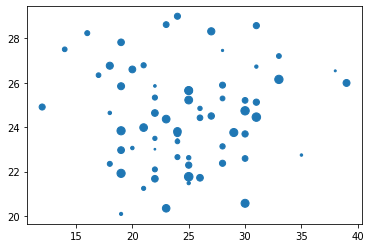

In [70]:
plt.scatter(urban_ride_count,
    urban_avg_fare, s= urban_driver_count)

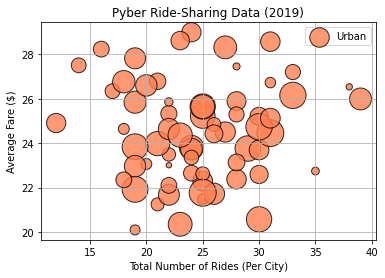

In [80]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count, c="coral",
            edgecolors="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.grid(True)
# Add the legend.

plt.legend()

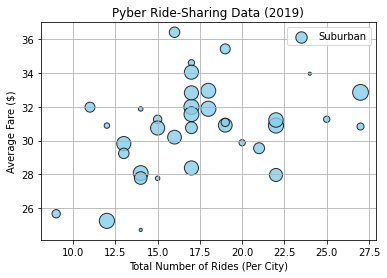

In [85]:
plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolors="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

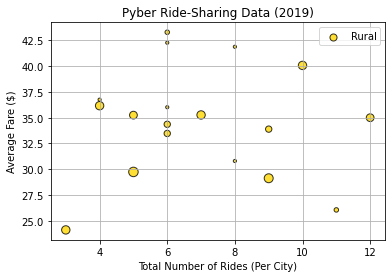

In [102]:
# Build scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
            c="gold", edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

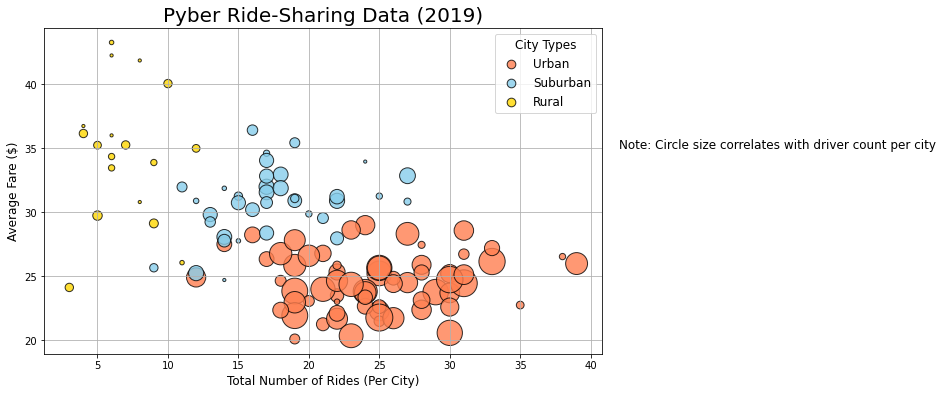

In [133]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count, c="coral",
            edgecolors="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Creating a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
            scatterpoints=1, loc="best", title= "City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [137]:
# Get summary statistics.
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [145]:
# Get summary statistics
urban_ride_count.describe()
# suburban_ride_count.describe()
# rural_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [147]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [148]:
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [152]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()
suburban_ride_count.mode()
# rural_ride_count.mode()

0    17
dtype: int64

In [157]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [158]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print("Mean: ", mean_suburban_ride_count) 
median_suburban_ride_count = np.median(suburban_ride_count)
print("Median: ", median_suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print("Mode: ", mode_suburban_ride_count)

Mean:  17.36111111111111
Median:  17.0
Mode:  ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [159]:
mean_rural_ride_count = np.mean(rural_ride_count) 
print(mean_rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
print(median_rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
print(mode_rural_ride_count)

6.944444444444445
6.0
ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [231]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


In [238]:
mean_urban_fare = np.mean(urban_fares)
mean_suburban_fare = np.mean(suburban_fares)
mean_rural_fare = np.mean(rural_fares)


In [237]:
median_urban_fare = np.median(urban_fares)
median_suburban_fare = np.median(suburban_fares)
median_rural_fare = np.median(rural_fares)


In [239]:
mode_urban_fare = sts.mode(urban_fares)
mode_suburban_fare = sts.mode(suburban_fares)
mode_rural_fare = sts.mode(rural_fares)

In [167]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head(10)
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [171]:
# mean, median mode for urban driver
mean_urban_driver_count = np.mean(urban_drivers)
median_urban_driver_count = np.median(urban_drivers)
mode_urban_ride_count = sts.mode(urban_drivers)

# mean, median mode for suburban driver
mean_suburban_driver_count = np.mean(suburban_drivers)
median_suburban_driver_count = np.median(suburban_drivers)
mode_suburban_driver_count = sts.mode(suburban_drivers)

# mean, median mode for rural driver
mean_rural_driver_count = np.mean(rural_drivers)
median_rural_driver_count = np.median(rural_drivers)
mode_rural_ride_count = sts.mode(rural_drivers)

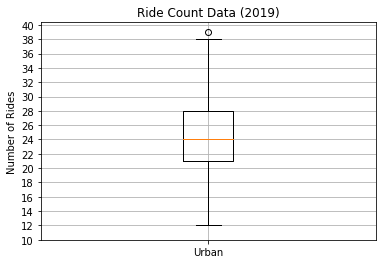

In [181]:
# Create a box-and-whisker plot for the urban cities ride count. 
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels= x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


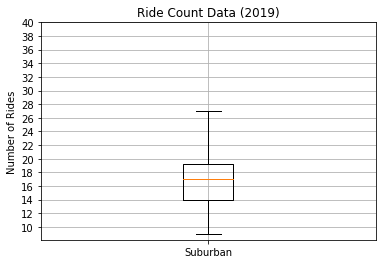

In [193]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels= x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()



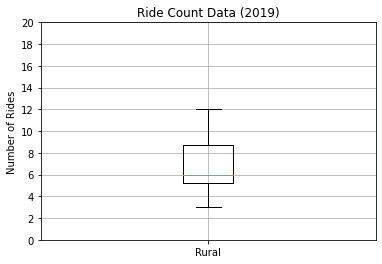

In [207]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,1, step=2.0))
ax.grid()

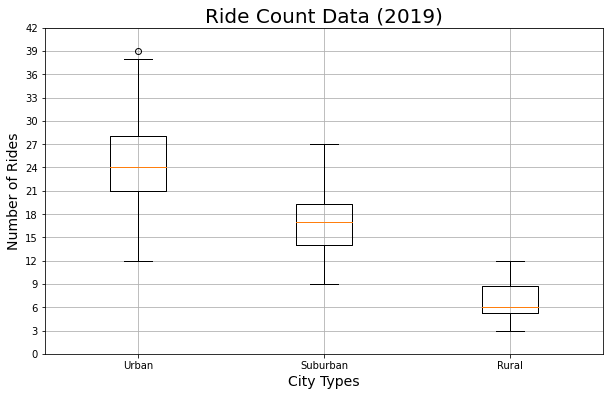

In [217]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [221]:
# Get the city that matches 39. 
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

urban_city_outlier

West Angela has the highest rider count.


'West Angela'

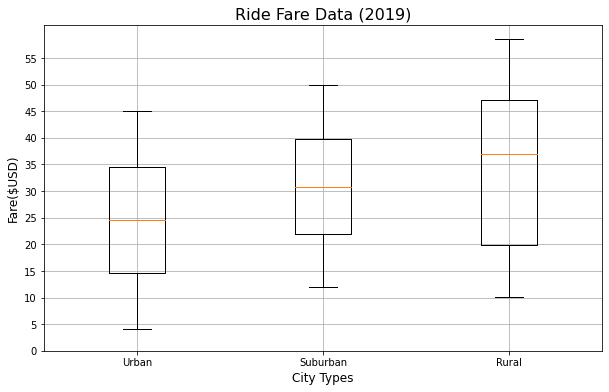

Summary Statistics


<Figure size 432x288 with 0 Axes>

In [264]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize =(10,6))
ax.boxplot([urban_fares, suburban_fares, rural_fares], labels=x_labels)
# Add the title, y-axis label and grid. 
ax.set_title('Ride Fare Data (2019)', fontsize=16)
ax.set_ylabel('Fare($USD)', fontsize=12)
ax.set_xlabel("City Types", fontsize=12)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()
plt.savefig("analysis/Fig3.png")


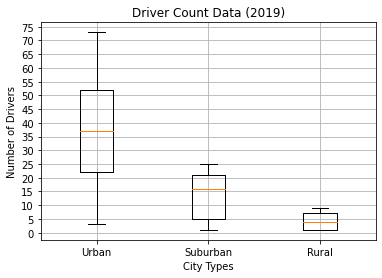

In [274]:
# Create the box-and-whisker plot for the urban driver count data. 
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
ax.boxplot([urban_drivers, suburban_drivers, rural_drivers], labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
plt.show()